In [1]:
#week5 

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
#Load  .env enviorment variables
load_dotenv()

True

In [4]:
#Part1-Personal Finance Planner
##Collect Crypto Price Using The requests libaray

In [5]:
#Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
#Crypto API URLs
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_url  =btc_url + "?format=json"
eth_url = eth_url + "?format=json"
requests.get(btc_url)
requests.get(eth_url)

<Response [200]>

In [7]:
#for Btc
response_btc=requests.get(btc_url).json()
print(json.dumps(response_btc, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19147543,
            "total_supply": 19147543,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 21692.0,
                    "volume_24h": 32751103825,
                    "market_cap": 415356128853,
                    "percentage_change_1h": 0.551382821194714,
                    "percentage_change_24h": 1.63122438277022,
                    "percentage_change_7d": 9.47716517820801,
                    "percent_change_1h": 0.551382821194714,
                    "percent_change_24h": 1.63122438277022,
                    "percent_change_7d": 9.47716517820801
                }
            },
            "last_updated": 1662887076
        }
    },
    "metadata": {
        "timestamp": 1662887076,
        "num_cryptoc

In [8]:
#For Eth
response_eth=requests.get(eth_url).json()
print(json.dumps(response_eth, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120469332,
            "total_supply": 120469332,
            "max_supply": 120469332,
            "quotes": {
                "USD": {
                    "price": 1765.7,
                    "volume_24h": 11860683537,
                    "market_cap": 212704732461,
                    "percentage_change_1h": 0.357562429702125,
                    "percentage_change_24h": 2.79206793601077,
                    "percentage_change_7d": 13.5004685996953,
                    "percent_change_1h": 0.357562429702125,
                    "percent_change_24h": 2.79206793601077,
                    "percent_change_7d": 13.5004685996953
                }
            },
            "last_updated": 1662887082
        }
    },
    "metadata": {
        "timestamp": 1662887082,
        "n

In [9]:
#Fetch Current BTC Price
btc_price = response_btc['data']['1']['quotes']['USD']['price']

In [10]:
#Fetch Current Eth Price
eth_price =response_eth['data']['1027']['quotes']['USD']['price']

In [11]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

In [12]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $26030.40
The current value of your 5.3 ETH is $9358.21


In [13]:
#Collect Investment data using ALPACA

In [14]:
#Set Current amount of shares
my_agg = 200
my_spy = 50

In [15]:
#set Alpaca key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

In [16]:
#create API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [17]:
#format current data as ISO format
today = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set the tickers
ticker = ["AGG", "SPY"]
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [18]:
#GET CLOSING PRICE 
df_ticker = alpaca.get_bars(
    ticker,
    timeframe,
    start = today
).df


# Display data 
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.730,119.395,119.43,5559066,15246,119.475306,AGG
2020-08-10 04:00:00+00:00,119.62,119.635,119.280,119.32,5152700,16679,119.403983,AGG
2020-08-11 04:00:00+00:00,119.11,119.210,118.840,118.99,7809897,19839,118.963269,AGG
2020-08-12 04:00:00+00:00,118.73,118.890,118.650,118.75,5524629,16150,118.765101,AGG
2020-08-13 04:00:00+00:00,118.77,118.780,118.240,118.31,8023792,24610,118.442915,AGG


In [19]:
#Reorganize dataFrame
#Separete ticker data as currently looks like Concat by row
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
#Display data 
AGG

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.730,119.395,119.43,5559066,15246,119.475306
2020-08-10 04:00:00+00:00,119.62,119.635,119.280,119.32,5152700,16679,119.403983
2020-08-11 04:00:00+00:00,119.11,119.210,118.840,118.99,7809897,19839,118.963269
2020-08-12 04:00:00+00:00,118.73,118.890,118.650,118.75,5524629,16150,118.765101
2020-08-13 04:00:00+00:00,118.77,118.780,118.240,118.31,8023792,24610,118.442915
...,...,...,...,...,...,...,...
2022-09-02 04:00:00+00:00,100.37,100.670,100.130,100.36,5963968,18228,100.362232
2022-09-06 04:00:00+00:00,99.96,99.970,99.410,99.42,5105618,20910,99.547845
2022-09-07 04:00:00+00:00,99.73,100.130,99.720,100.11,3602611,15080,99.986643


In [20]:
#concat data
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])
# Display data
df_ticker.head()


AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2020-08-07 04:00:00+00:00  119.66  119.730  119.395  119.43  5559066   
2020-08-10 04:00:00+00:00  119.62  119.635  119.280  119.32  5152700   
2020-08-11 04:00:00+00:00  119.11  119.210  118.840  118.99  7809897   
2020-08-12 04:00:00+00:00  118.73  118.890  118.650  118.75  5524629   
2020-08-13 04:00:00+00:00  118.77  118.780  118.240  118.31  8023792   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-08-07 04:00:00+00:00       15246  119.475306  333.29  334.8800  332.3000   
2020-08-10 04:00:00+00:00       16679  119.403983  335.00  335.7700  332.9550   
2020-08-11 04:00:00+00:00       19839  118.963269  336.86  337.5400  332.0100   
2020-08-12 04:00:00+00:00       16150  118.765101  335.47  338.2800  332.8377   
2020-08-13 04:00:00+00:00       24610  118.442915  336.58  338.2514  335.8300   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372  
2020-08-10 04:00:00+00:00  335.57  44268089      284606  334.984210  
2020-08-11 04:00:00+00:00  332.80  69601087      385851  335.212188  
2020-08-12 04:00:00+00:00  337.44  53717138      312587  336.712689  
2020-08-13 04:00:00+00:00  336.83  41816146      278288  337.208317

In [21]:
#Pick Share closing price
agg_close_price=float(df_ticker['AGG']["close"][0])
spy_close_price=float(df_ticker['SPY']["close"][0])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [22]:
# Compute shares value
my_agg_value= agg_close_price*my_agg
my_spy_value= spy_close_price*my_spy

#Display
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16728.50
The current value of your 200 AGG shares is $23886.00


In [23]:
#Saving Health Analysis
#monthly income 
monthly_income=12000

In [24]:
# Consolidate financial assets data
# YOUR CODE HERE!
crypto = btc_price + eth_price
shares = my_agg_value + my_spy_value
amount_data = {
    "amount":[crypto,shares]
}
index_data  = ("crypto", "shares")
# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=index_data)
# Display savings DataFrame
display(df_savings)

,amount
crypto,23457.7
shares,40614.5


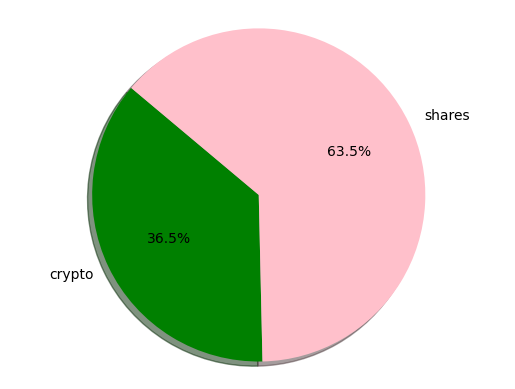

In [1]:
# Plot savings pie chart
# YOUR CODE HERE!
import matplotlib.pyplot as plt
labels= 'crypto','shares'
sizes=[23313.78,40614.50]
colors=['Green',"pink"]
explode=(0,1)

plt.pie(sizes, labels=labels, colors=colors,
 autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()



In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
# YOUR CODE HERE!
total_saving=crypto + shares
# Validate saving health
# YOUR CODE HERE!
if total_saving > emergency_fund:
    print("Good on you ,Congratulations you have enough money in your emergency fund")
elif total_saving == emergency_fund:
    print("just reach the goal")
elif total_saving < emergency_fund:
    print("Not enough")



Good on you ,Congratulations you have enough money in your emergency fund


In [27]:
#Part2

In [28]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-09-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-10', tz='America/New_York').isoformat()

In [29]:
#Get 5 years historical data for AGG
# Set the ticker
ticker = "AGG"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2017-09-10", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-10", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-09-11 04:00:00+00:00,110.27,110.29,110.10,110.14,2492743,10614,110.194231
2017-09-12 04:00:00+00:00,110.04,110.06,109.92,109.98,2403562,8614,109.979269
2017-09-13 04:00:00+00:00,110.00,110.04,109.86,109.87,1304102,6565,109.926598
2017-09-14 04:00:00+00:00,109.81,109.97,109.81,109.93,1704216,7111,109.914840
2017-09-15 04:00:00+00:00,110.00,110.04,109.86,109.91,2818046,7997,109.928798


In [30]:
#get 5 years data for SPY
ticker = "SPY"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2017-09-8", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-8", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-09-08 04:00:00+00:00,246.54,247.11,246.30,246.58,63832825,185692,246.653947
2017-09-11 04:00:00+00:00,248.04,249.30,248.02,249.21,71364848,211601,248.758253
2017-09-12 04:00:00+00:00,249.64,250.09,249.42,250.05,56896027,192649,249.791314
2017-09-13 04:00:00+00:00,249.73,250.21,249.59,250.17,59228002,147055,250.040408
2017-09-14 04:00:00+00:00,249.83,250.32,249.60,250.09,95446349,188794,250.052841


In [32]:
# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])
df_stock_data.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2020-08-07 04:00:00+00:00  119.66  119.730  119.395  119.43  5559066   
2020-08-10 04:00:00+00:00  119.62  119.635  119.280  119.32  5152700   
2020-08-11 04:00:00+00:00  119.11  119.210  118.840  118.99  7809897   
2020-08-12 04:00:00+00:00  118.73  118.890  118.650  118.75  5524629   
2020-08-13 04:00:00+00:00  118.77  118.780  118.240  118.31  8023792   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-08-07 04:00:00+00:00       15246  119.475306  333.29  334.8800  332.3000   
2020-08-10 04:00:00+00:00       16679  119.403983  335.00  335.7700  332.9550   
2020-08-11 04:00:00+00:00       19839  118.963269  336.86  337.5400  332.0100   
2020-08-12 04:00:00+00:00       16150  118.765101  335.47  338.2800  332.8377   
2020-08-13 04:00:00+00:00       24610  118.442915  336.58  338.2514  335.8300   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372  
2020-08-10 04:00:00+00:00  335.57  44268089      284606  334.984210  
2020-08-11 04:00:00+00:00  332.80  69601087      385851  335.212188  
2020-08-12 04:00:00+00:00  337.44  53717138      312587  336.712689  
2020-08-13 04:00:00+00:00  336.83  41816146      278288  337.208317

In [33]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_data = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)
# Set number of simulations
num_sims = 500

In [34]:
#Running
MC_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 110.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 120.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 130.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 140.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 150.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 160.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 170.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 180.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 190.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 200.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 210.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 220.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 230.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 240.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 250.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 260.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 270.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 280.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 290.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 300.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 310.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 320.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 330.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 340.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 350.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 360.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 370.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 380.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 390.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 400.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 410.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 420.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 430.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 440.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 450.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 460.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 470.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 480.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Running Monte Carlo simulation number 490.


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998049,0.997246,1.009207,0.993458,1.007412,1.002007,0.994820,1.000844,0.993652,1.006883,...,1.003204,0.995108,1.001044,1.009908,0.997127,0.995291,0.993062,1.002959,0.999881,1.001422
2,0.993028,0.998772,1.009980,0.984891,1.002836,1.001520,0.994454,0.995640,0.991227,1.013071,...,1.005018,0.998407,0.994567,1.012210,0.998088,0.992367,0.992716,1.014580,1.000437,1.004222
3,0.991564,0.999688,1.005991,0.995665,1.002855,0.998443,0.987143,0.989419,0.986714,1.020035,...,1.001262,0.993142,1.002328,1.020063,0.986497,1.002856,0.982606,1.007275,1.004636,1.003123
4,0.992184,0.986184,1.011465,1.001064,1.001202,0.996407,0.984998,0.985849,0.976274,1.021991,...,0.987462,0.993829,1.008875,1.021114,0.990564,1.002448,0.976273,1.010789,1.014357,0.995848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.627008,3.727149,1.595210,4.277119,1.482235,0.903179,0.649868,0.446034,1.740638,5.445805,...,3.849033,1.573314,5.525711,4.521397,6.820578,2.032828,1.628416,2.160430,3.080627,0.859395
7557,1.637399,3.697339,1.604649,4.271150,1.487944,0.892764,0.646537,0.448382,1.735229,5.476348,...,3.902959,1.554012,5.545478,4.490639,6.883606,2.025320,1.603807,2.146030,3.104577,0.854302
7558,1.639927,3.694335,1.609209,4.275597,1.501688,0.905772,0.646463,0.447681,1.737456,5.466194,...,3.896625,1.563303,5.503800,4.512882,6.905572,2.034718,1.605084,2.156170,3.088176,0.854140
7559,1.658489,3.684797,1.601587,4.282128,1.504718,0.912678,0.650801,0.447605,1.734699,5.468669,...,3.911812,1.560597,5.517520,4.522910,6.889976,2.052611,1.619840,2.156554,3.091582,0.861894


In [35]:
#Display
MC_data.portfolio_data.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2020-08-07 04:00:00+00:00  119.66  119.730  119.395  119.43  5559066   
2020-08-10 04:00:00+00:00  119.62  119.635  119.280  119.32  5152700   
2020-08-11 04:00:00+00:00  119.11  119.210  118.840  118.99  7809897   
2020-08-12 04:00:00+00:00  118.73  118.890  118.650  118.75  5524629   
2020-08-13 04:00:00+00:00  118.77  118.780  118.240  118.31  8023792   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-08-07 04:00:00+00:00       15246  119.475306          NaN  333.29   
2020-08-10 04:00:00+00:00       16679  119.403983    -0.000921  335.00   
2020-08-11 04:00:00+00:00       19839  118.963269    -0.002766  336.86   
2020-08-12 04:00:00+00:00       16150  118.765101    -0.002017  335.47   
2020-08-13 04:00:00+00:00       24610  118.442915    -0.003705  336.58   

                                                                             \
                               high       low   close    volume trade_count   
timestamp                                                                     
2020-08-07 04:00:00+00:00  334.8800  332.3000  334.57  57282821      350100   
2020-08-10 04:00:00+00:00  335.7700  332.9550  335.57  44268089      284606   
2020-08-11 04:00:00+00:00  337.5400  332.0100  332.80  69601087      385851   
2020-08-12 04:00:00+00:00  338.2800  332.8377  337.44  53717138      312587   
2020-08-13 04:00:00+00:00  338.2514  335.8300  336.83  41816146      278288   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-08-07 04:00:00+00:00  333.800372          NaN  
2020-08-10 04:00:00+00:00  334.984210     0.002989  
2020-08-11 04:00:00+00:00  335.212188    -0.008255  
2020-08-12 04:00:00+00:00  336.712689     0.013942  
2020-08-13 04:00:00+00:00  337.208317    -0.001808

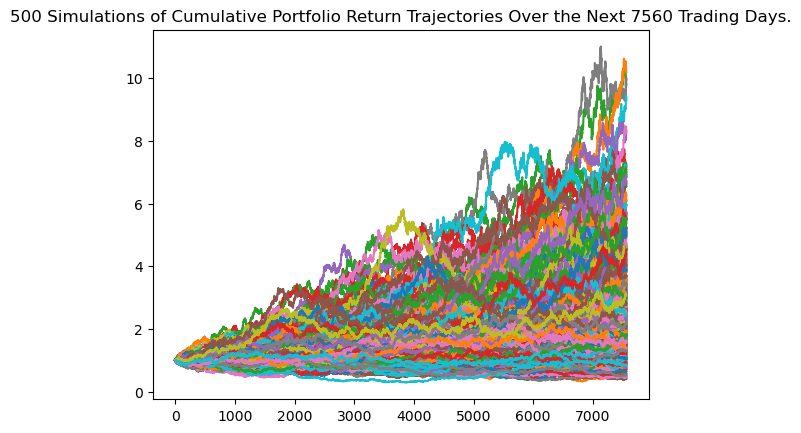

In [36]:
# Plot simulation outcomes
line_plot = MC_data.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_data_sim_plot.png", bbox_inches="tight")

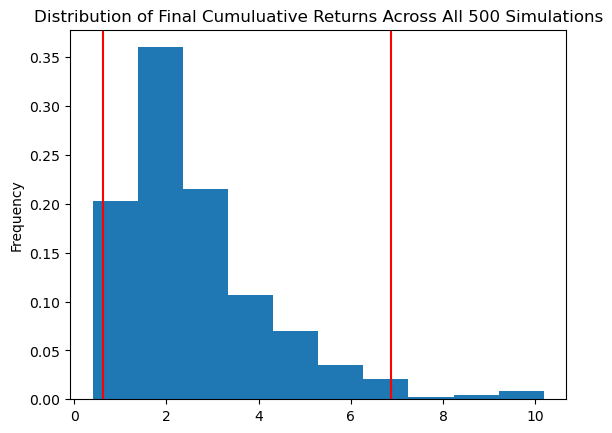

In [37]:
 # Plot probability distribution and confidence intervals
dist_plot = MC_data.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_data_dist_plot.png',bbox_inches='tight')

In [47]:
#Retirement Analysis
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_data.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.618107
std               1.592207
min               0.406022
25%               1.540368
50%               2.198057
75%               3.243167
max              10.180846
95% CI Lower      0.636700
95% CI Upper      6.872312
Name: 7560, dtype: float64


/Users/dann1/Desktop/CODE/week5/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [50]:
#Calculate The expected portfolio Return at the 95%,based on $20000 initial investment
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
even_ci_lower = round(tbl[8]*20000,2)
even_ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $12734.01 and $137446.24


In [53]:
#Calculate 95% based on 50% increase in initial investment
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
even_ci_lower = round(tbl[8]*30000,2)
even_ci_upper = round(tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $12734.01 and $137446.24
